<a href="https://colab.research.google.com/github/andssuu/PBEA7347/blob/main/notebooks/b3_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/andssuu/PBEA7347.git



fatal: destination path 'PBEA7347' already exists and is not an empty directory.


     soma_div_cagr  divida_liquida  media eficiencia
0           0.2618           -1.56           0.15825
1           0.1165           -0.65           0.19705
2           0.1923            1.02           0.18455
3           0.0481            2.58           0.09175
4           0.2977            2.09           0.23005
..             ...             ...               ...
391         0.0000           82.48           0.46390
392         0.0000           94.31          -0.01220
393        -0.3097          170.19          -0.00040
394         0.0000          192.84          -0.03285
395        -0.4673          315.74           0.04635

[396 rows x 3 columns]


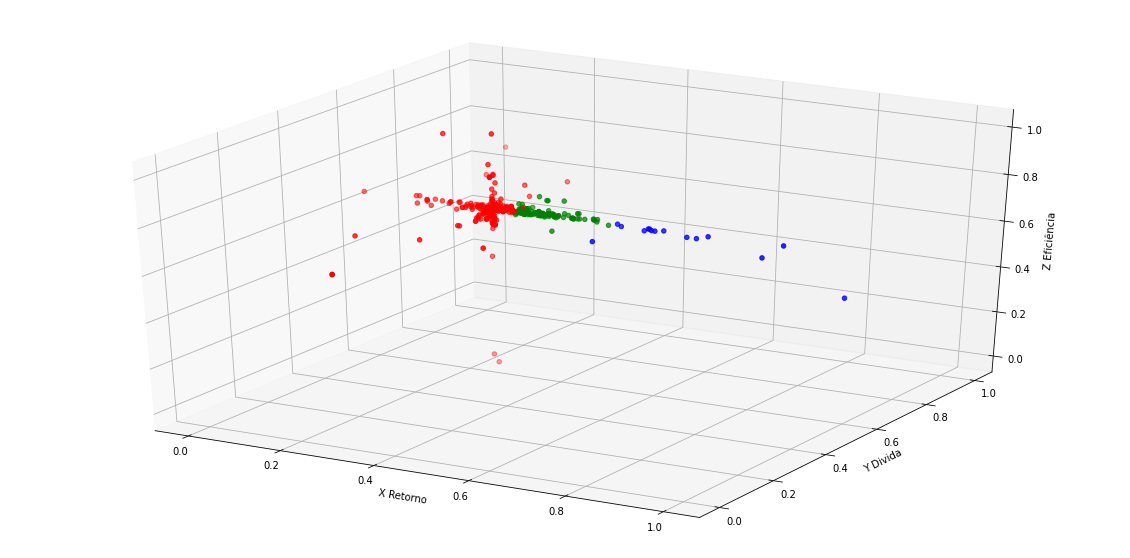

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('PBEA7347/data/b3_data_14012021.csv', float_precision='high', sep=";")
# data = df.iloc[:, 10:]
labels = df.iloc[:, 0]

divida = df.iloc[:, 12:]
retorno = df.iloc[:,11:12]
patrimonio = df.iloc[:,3:4]
eficiencia = df.iloc[:, 7:9]

eficiencia["media eficiencia"] = eficiencia.sum(axis=1) / 2

eficienciaMedia = eficiencia.iloc[:, 2:]

data = retorno
data = data.join(divida)
data = data.join(eficienciaMedia)

normalized_data = (data - data.min()) / (data.max() - data.min())
# normalized_data = data
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_data)
#print(kmeans.labels_)
data_clustered = kmeans.predict(normalized_data)
#print(kmeans.cluster_centers_)

fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')

LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue', 2: 'green'}
label_color = [LABEL_COLOR_MAP[l] for l in data_clustered]
graph.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=label_color, marker='o', s=20)

graph.set_xlabel('X Retorno')
graph.set_ylabel('Y Divida')
graph.set_zlabel('Z Eficiência')

for x, y, z, label in zip(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], labels):
    # normalized_data.iloc[:, 0] <= 3 DIVIDA
    # normalized_data.iloc[:, 1] >= 5 RETORNO
    # normalized_data.iloc[:, 2] >= 1.2 PATRIMONIO LIQUIDO
    #print(x, y, z, label)
    if x >= 0.304081 and y <=0.557621 and z>=0.681543:
        # ax.text(x, y, z, label, None) 
        pass;

plt.show()


In [106]:
(0.04 - data.min()) / (data.max() - data.min())

soma_div_cagr       0.304081
divida_liquida      0.553434
media eficiencia    0.680370
dtype: float64

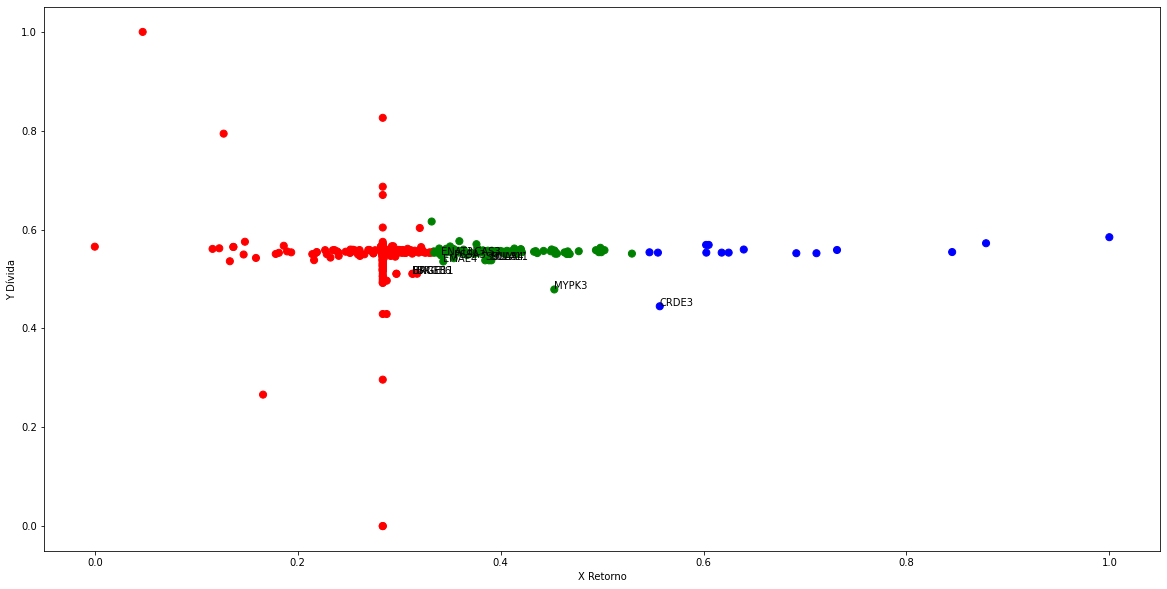

In [108]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111)
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue'}
# label_color = [LABEL_COLOR_MAP[l] for l in data_clustered]
graph.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], c=label_color, marker='o', s=50)

graph.set_xlabel('X Retorno')
graph.set_ylabel('Y Dívida')


for x, y, label in zip(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], labels):
    # normalized_data.iloc[:, 0] <= 3 DIVIDA
    # normalized_data.iloc[:, 1] >= 5 RETORNO
    # normalized_data.iloc[:, 2] >= 1.2 PATRIMONIO LIQUIDO
    #print(x, y, z, label)
    if x >= 0.3 and y <=0.55:
        graph.text(x, y, label, ) 
  

plt.show()



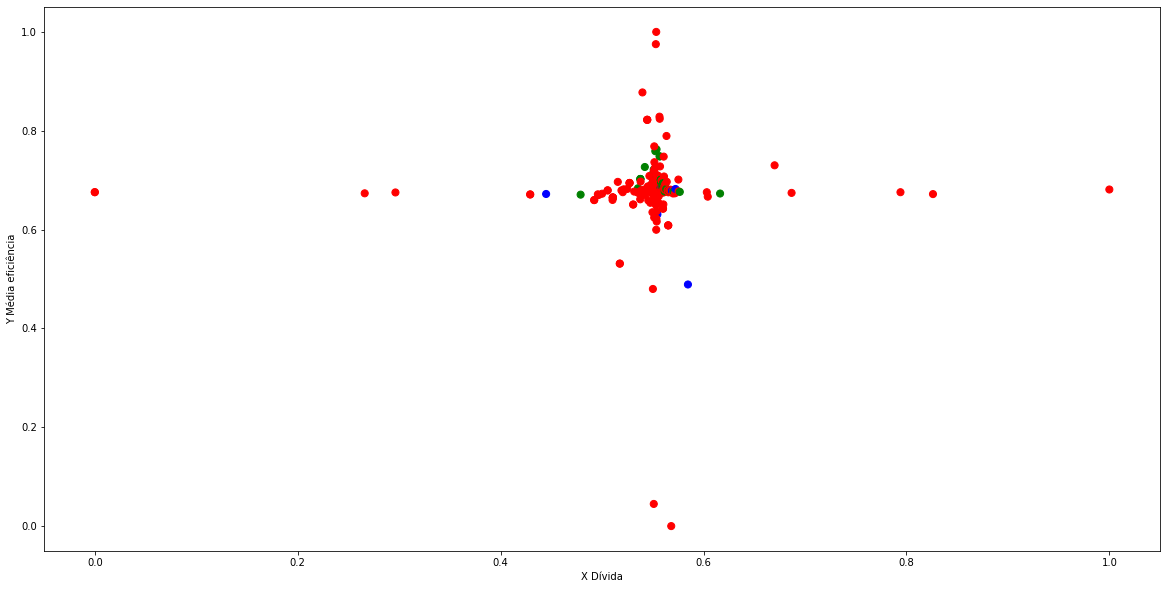

In [92]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111)
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue'}
# label_color = [LABEL_COLOR_MAP[l] for l in data_clustered]
graph.scatter(normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=label_color, marker='o', s=50)

graph.set_xlabel('X Dívida')
graph.set_ylabel('Y Média eficiência')

plt.show()

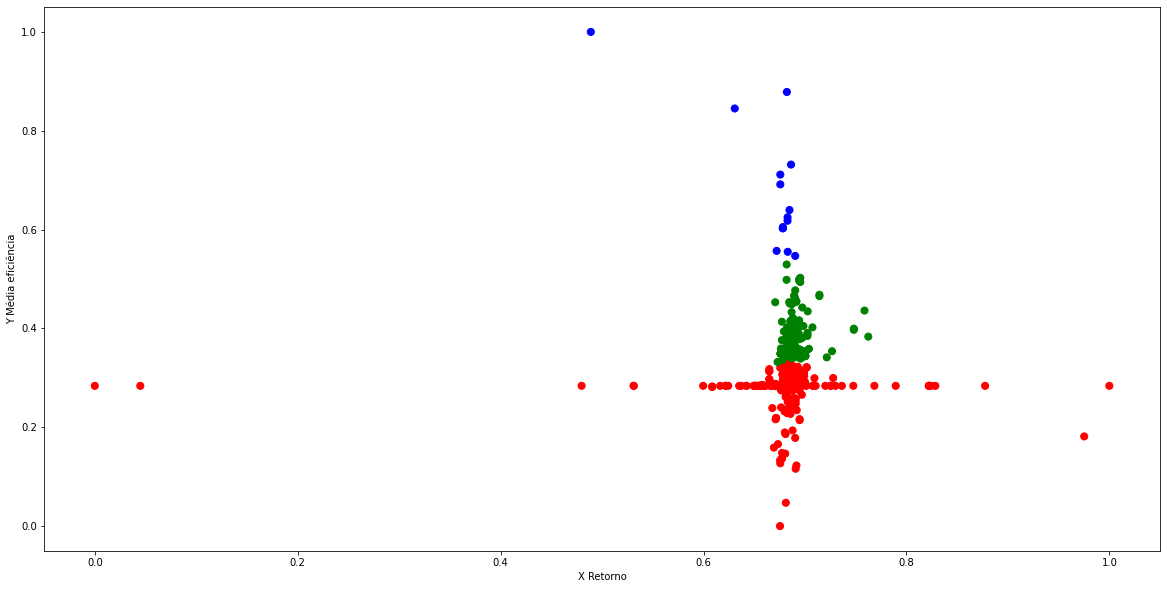

In [104]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111)
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue'}
# label_color = [LABEL_COLOR_MAP[l] for l in data_clustered]
graph.scatter(normalized_data.iloc[:, 2], normalized_data.iloc[:, 0], c=label_color, marker='o', s=50)

graph.set_xlabel('X Retorno')
graph.set_ylabel('Y Média eficiência')

plt.show()